# ISOMAP

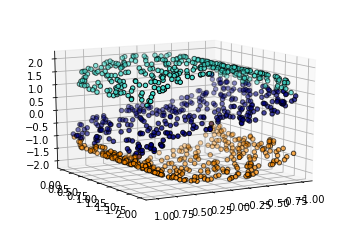

In [1]:
from sklearn import manifold, datasets
from time import time
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['turquoise', 'navy', 'darkorange'])
%matplotlib inline 
import numpy as np
from sklearn.neighbors import NearestNeighbors, kneighbors_graph
from sklearn.utils.graph import graph_shortest_path
from sklearn.decomposition import KernelPCA

from sklearn.datasets.samples_generator import make_swiss_roll
n_points = 1000
n_neighbors = 10
n_components = 2
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color,marker='o',edgecolors='black', cmap=cmap_light)
ax.view_init(14, 60)
plt.show()

In [2]:
iris = datasets.load_iris()
data = iris.data
labels = iris.target
target_ids = np.unique(labels)#labels = array([0, 1, 2])

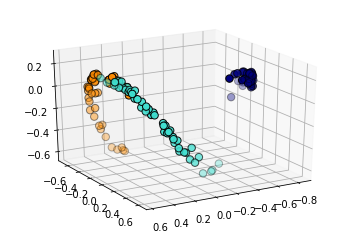

In [3]:
transformer_r = KernelPCA(n_components=3, kernel='rbf')
KRI = transformer_r.fit_transform(iris.data)

fig = plt.figure()
ax = plt.axes(projection='3d')
colors = ['navy', 'turquoise', 'darkorange']
for i, c,label in zip(target_ids, colors, iris.target_names):
    ax.scatter(KRI[i == labels, 0], KRI[i == labels, 1], KRI[i == labels, 2],s=55, c=c,marker='o',edgecolors='black', cmap=cmap_light)
ax.view_init(24, 60)
plt.show()

## The Isomap Algorithm

In [4]:
n_neighbors=10 
n_components=2
nbrs_ = NearestNeighbors()
nbrs_.fit(X)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [5]:
kng = kneighbors_graph(nbrs_, n_neighbors, mode='distance')


In [6]:
kng.toarray().shape

(1000, 1000)

In [7]:
kng.toarray()[0][:10]

array([0.        , 0.        , 0.        , 0.23472124, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [8]:
dist_matrix_ = graph_shortest_path(kng)
dist_matrix_.shape

(1000, 1000)

In [9]:
dist_matrix_[0][:10]

array([0.        , 2.13429683, 0.56589759, 0.23472124, 1.75305824,
       1.15092274, 1.20797483, 3.56727011, 4.15582681, 1.87545239])

In [10]:
G = dist_matrix_ ** 2
G *= -0.5

kernel_pca_ = KernelPCA(n_components=n_components,kernel="precomputed")

embedding_ = kernel_pca_.fit_transform(G)     

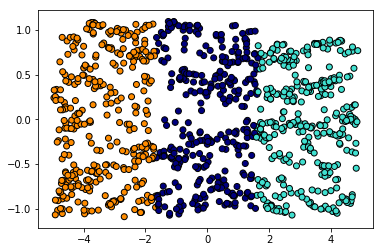

In [11]:


I = embedding_
plt.scatter(I[:, 0], I[:, 1], c=color,marker='o',edgecolors='black', cmap=cmap_light)
plt.show()

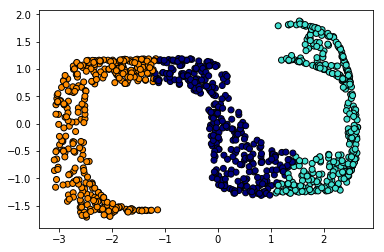

In [17]:
Y = manifold.Isomap(100, n_components).fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], c=color, marker='o',edgecolors='black',cmap=cmap_light)
plt.show()

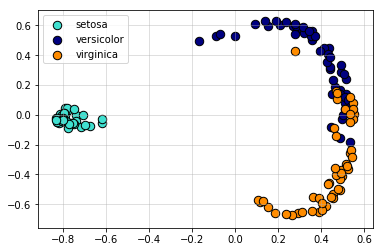

In [13]:
iris = datasets.load_iris()
data = iris.data
labels = iris.target
target_ids = np.unique(labels)#labels = array([0, 1, 2])

n = manifold.Isomap(110, n_components).fit_transform(KRI)

colors = ['turquoise', 'navy', 'darkorange']

for i, c,label in zip(target_ids, colors, iris.target_names):
    plt.scatter(n[i == labels, 0], n[i == labels, 1], c = c, edgecolors='black', s=285,label=label, marker='.')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

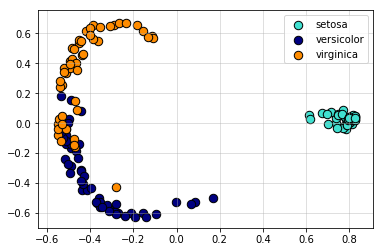

In [14]:
from sklearn.decomposition import PCA

y = iris.target

pca = PCA(n_components=2).fit(KRI)

X_pca = pca.transform(KRI)

for i, c, label in zip(target_ids, colors, iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
               c=c,  edgecolors='black', s=285,label=label, marker='.')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

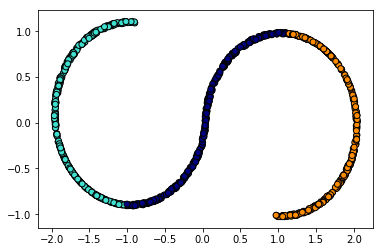

In [15]:
y = iris.target

pca = PCA(n_components=2).fit(X)

Y = pca.transform(X)


plt.scatter(Y[:, 0], Y[:, 1], c=color, marker='o',edgecolors='black',cmap=cmap_light)
plt.show()